# Unit 5 - Financial Planning

In [170]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [171]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [172]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [173]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [174]:
# Fetch current BTC price
response_btc = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD").json()
btc_price = response_btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response_eth = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD").json()
eth_price = response_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f'The current value of your {my_btc} BTC is ${my_btc_value:0.2f}')
print(f'The current value of your {my_eth} ETH is ${my_eth_value:0.2f}')


The current value of your 1.2 BTC is $52228.80
The current value of your 5.3 ETH is $17323.74


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [175]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [176]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [177]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-04-06", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-06", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-06 04:00:00+00:00,105.20,105.805,105.115,105.49,13322630,47090,105.463015,AGG
2022-04-06 04:00:00+00:00,446.87,448.930,443.470,446.52,105592595,901634,446.345270,SPY


In [178]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Display sample data
display(AGG.head())
display(SPY.head())



,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-04-06 04:00:00+00:00,105.2,105.805,105.115,105.49,13322630,47090,105.463015


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-04-06 04:00:00+00:00,446.87,448.93,443.47,446.52,105592595,901634,446.34527


In [179]:

# Concatenate the ticker DataFrames
df_ticker=pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_ticker.head()



AGG                                      \
                            open     high      low   close    volume   
timestamp                                                              
2022-04-06 04:00:00+00:00  105.2  105.805  105.115  105.49  13322630   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-06 04:00:00+00:00       47090  105.463015  446.87  448.93  443.47   

                                                                     
                            close     volume trade_count       vwap  
timestamp                                                            
2022-04-06 04:00:00+00:00  446.52  105592595      901634  446.34527

In [180]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker['AGG']['close'])
spy_close_price = float(df_ticker['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $105.49
Current SPY closing price: $446.52


In [181]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22326.00
The current value of your 200 AGG shares is $21098.00


### Savings Health Analysis

In [182]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_stocks_bonds = my_agg_value + my_spy_value
total_crypto = my_btc_value + my_eth_value

# Create savings DataFrame
savings_data = [total_stocks_bonds, total_crypto]
df_savings = pd.DataFrame(savings_data, columns= ['amount'], index =["stocks/bonds", "crypto"])

# Display savings DataFrame
display(df_savings)

,amount
stocks/bonds,43424.000
crypto,69552.539


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

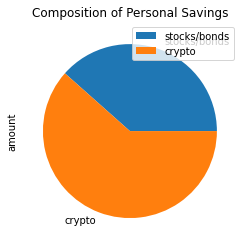

In [183]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title = "Composition of Personal Savings")

In [184]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(savings_data)

# Validate saving health
if total_savings > emergency_fund:
    print('congratulations for having enough money in this fund.')
elif total_savings == emergency_fund:
    print('congratulations on reaching this financial goal.')
elif total_savings < emergency_fund:
    print(f'You are {emergency_fund - total_savings} dollars away from reaching the goal.')

congratulations for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [185]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [186]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [187]:
# Get 5 years' worth of historical data for SPY and AGG
limit_rows = 10000
portfolio_prices_five_years = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = limit_rows
).df

# Reorganize the DataFrame
# Separate ticker data
agg_df = portfolio_prices_five_years[portfolio_prices_five_years['symbol'] == 'AGG'].drop('symbol', axis=1)
spy_df = portfolio_prices_five_years[portfolio_prices_five_years['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_df, spy_df], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [188]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)



In [189]:
# Printing the simulation input data
mc_thirty_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [190]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\GSKri\financial_planner\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995898,0.999026,0.994938,1.003800,1.000006,1.001183,0.997572,1.009021,1.001766,1.010032,...,1.007864,0.996497,1.005500,0.987189,1.006939,1.000767,0.994433,0.994336,0.993549,1.000515
2,0.983637,0.999867,1.002155,1.012436,1.006815,1.001594,0.996086,1.018247,1.000549,1.008027,...,1.015001,0.992216,1.008555,0.990994,1.012975,0.999603,0.998891,0.997111,0.986248,0.992030
3,0.976588,0.995224,1.005176,1.011540,1.005773,1.008630,0.990186,1.024834,1.001229,1.002527,...,1.019061,0.987284,1.018896,0.997091,1.020567,0.994070,1.005590,0.987496,0.987653,0.981391
4,0.983610,0.991381,1.004635,1.013975,1.011438,1.015827,1.004398,1.008550,0.999570,0.991013,...,1.023038,0.991175,1.022570,0.999934,1.023208,0.988286,1.009768,0.998092,0.980401,0.994684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,26.830665,23.496866,27.816583,62.056060,9.782376,20.460013,13.214448,13.832695,47.522664,4.924332,...,4.046335,21.106521,12.375143,19.254575,14.961283,16.323965,6.530865,17.070695,22.195137,20.374695
7557,27.030569,23.615616,27.875825,62.133267,9.846396,20.674986,13.174962,13.698875,47.091670,4.905906,...,4.044518,21.127534,12.313945,19.337350,15.014236,16.249817,6.495409,17.112836,22.113603,20.334945
7558,27.212746,23.264595,28.233606,62.267752,9.934991,20.721015,13.200031,13.760468,47.241088,4.915862,...,4.007149,21.257468,12.216656,19.271115,15.094807,16.203930,6.489791,17.088975,22.075330,20.256240
7559,27.307053,23.232423,27.888151,62.613327,9.954792,20.962601,13.123248,13.846111,48.219345,4.941527,...,4.042314,21.173447,12.220894,19.424566,15.027375,16.222056,6.540421,17.087345,21.853570,20.072547


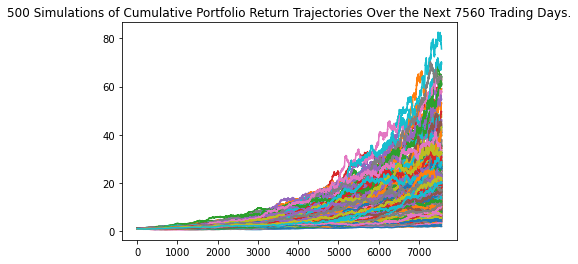

In [191]:
# Plot simulation outcomes
sim_plot_thirty_year = mc_thirty_year.plot_simulation()

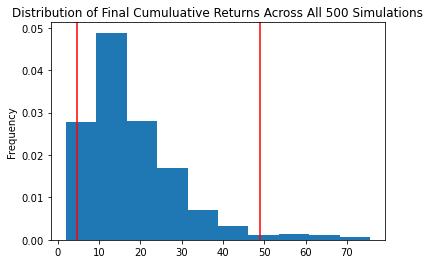

In [192]:
# Plot probability distribution and confidence intervals
dist_plot_thirty_year = mc_thirty_year.plot_distribution()

### Retirement Analysis

In [193]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_thirty_year = mc_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(stats_thirty_year)

count           500.000000
mean             18.139589
std              11.543352
min               1.939383
25%              10.158194
50%              14.904501
75%              23.250087
max              75.644896
95% CI Lower      4.643112
95% CI Upper     49.056403
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [194]:
# Set initial investment
initial_investment_thirty = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats_thirty_year[8]*initial_investment_thirty,2)
ci_upper = round(stats_thirty_year[9]*initial_investment_thirty,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_thirty} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92862.24 and $981128.06


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [195]:
# Set initial investment
initial_investment_thirty_inc = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats_thirty_year[8]*initial_investment_thirty_inc,2)
ci_upper = round(stats_thirty_year[9]*initial_investment_thirty_inc,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_thirty_inc} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $139293.36 and $1471692.08


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [196]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [197]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

display(mc_five_year.portfolio_data.head())

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [198]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\GSKri\financial_planner\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995339,0.996176,0.995631,1.001959,1.001221,0.999645,1.006713,1.008084,1.001836,0.990394,...,1.012605,1.001738,1.005077,1.002040,1.003056,0.996954,1.015777,1.001748,0.999717,0.995498
2,0.992045,0.989394,0.989968,1.017077,1.010051,1.003327,1.004112,1.006433,1.003945,0.977034,...,1.009661,1.011436,1.009147,1.011492,1.003444,0.990724,1.004053,1.003528,1.003779,0.990612
3,0.997983,0.993952,0.984403,1.020417,1.008372,1.009140,1.011535,0.999619,0.996663,0.967810,...,1.017463,1.021475,1.007420,1.010565,1.005199,0.985871,1.006898,0.998385,1.015188,0.978621
4,0.996802,0.994932,0.978059,1.016846,1.004504,1.016996,1.015594,1.004375,0.984857,0.964781,...,1.026991,1.011908,1.004469,1.014302,1.003377,1.003334,1.006570,0.988756,1.025173,0.976995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.445045,0.812902,0.961581,1.543663,1.312123,1.900191,1.297311,1.352011,1.914570,1.309525,...,1.756095,0.964347,2.054639,1.253617,1.570665,1.269182,2.029614,1.589158,1.453318,2.601570
1257,1.453450,0.816496,0.970603,1.530584,1.308244,1.907599,1.293924,1.354219,1.938457,1.311059,...,1.758007,0.976256,2.049566,1.262477,1.578746,1.250206,2.035697,1.612868,1.473074,2.608085
1258,1.450875,0.814529,0.978132,1.544746,1.320438,1.922466,1.292572,1.367682,1.937341,1.324094,...,1.761317,0.985280,2.037377,1.270091,1.580049,1.240239,2.012044,1.618078,1.476419,2.582563
1259,1.456706,0.815492,0.967568,1.538350,1.325052,1.925115,1.286217,1.368070,1.938267,1.304065,...,1.773543,0.975610,2.020511,1.272324,1.578600,1.242261,2.016966,1.622960,1.459363,2.583491


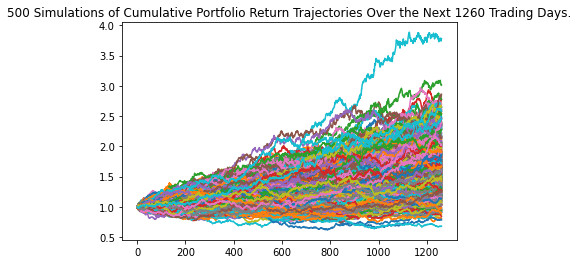

In [199]:
# Plot simulation outcomes
sim_plot_five_year = mc_five_year.plot_simulation()

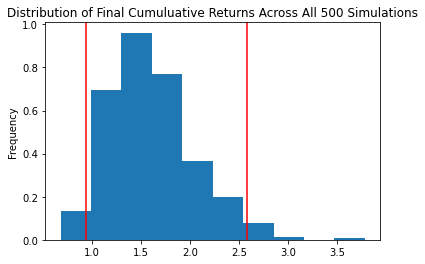

In [200]:
# Plot probability distribution and confidence intervals
dist_plot_five_year = mc_five_year.plot_distribution()

In [201]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_five_year = mc_five_year.summarize_cumulative_return()

# Print summary statistics
print(stats_five_year)

count           500.000000
mean              1.611790
std               0.425549
min               0.680659
25%               1.293758
50%               1.557367
75%               1.869853
max               3.780677
95% CI Lower      0.942385
95% CI Upper      2.578123
Name: 1260, dtype: float64


In [202]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stats_five_year[8]*initial_investment_five,2)
ci_upper_five = round(stats_five_year[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56543.08 and $154687.37


### Ten Years Retirement Option

In [203]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [204]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year = MCSimulation(
    portfolio_data= df_stock_data,
    weights= [.40, .60],
    num_simulation= 500,
    num_trading_days= 252 * 10
)

display(mc_ten_year.portfolio_data.head())

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [205]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\GSKri\financial_planner\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994310,1.000916,1.002117,1.003077,1.013588,0.997222,1.005143,0.996698,1.003414,0.989376,...,0.989199,0.991064,0.993307,0.990505,1.002717,0.995477,0.989183,1.000400,0.996369,1.007617
2,0.988835,0.999675,1.017190,1.006506,1.006913,1.004704,1.000508,0.999861,0.990427,0.995604,...,0.990750,0.988766,0.995779,0.998207,0.988704,0.986921,0.990846,0.984894,0.994653,1.010279
3,1.004684,0.987826,1.021788,1.016026,1.012355,1.008337,0.989094,1.004078,0.976178,0.979560,...,0.984725,0.996315,0.993491,0.994061,0.996563,0.994165,0.987893,0.988337,0.988085,1.002656
4,1.005097,0.991095,1.028459,1.025116,1.027756,1.011747,0.985307,1.004218,0.978167,0.979429,...,0.987612,1.001354,0.990707,0.986169,0.996812,0.972694,0.995634,0.991031,0.988159,1.003029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.504106,4.271913,3.752528,3.883317,2.827602,1.195603,2.150851,1.316500,3.363201,2.217686,...,4.024948,3.627412,1.677215,2.398927,1.485713,1.473959,2.289501,1.996500,2.668595,1.907182
2517,2.511130,4.290543,3.747337,3.897339,2.848980,1.186712,2.150973,1.336285,3.361643,2.210964,...,4.010650,3.623761,1.671743,2.390434,1.492279,1.467833,2.260634,2.009660,2.668042,1.903265
2518,2.535811,4.304848,3.757991,3.917621,2.864576,1.172247,2.147246,1.312369,3.357415,2.207536,...,4.045092,3.608387,1.688262,2.380486,1.500914,1.462670,2.241705,2.025491,2.670021,1.896897
2519,2.537745,4.336723,3.733929,3.989351,2.862682,1.168913,2.125177,1.305489,3.366030,2.191920,...,4.016828,3.593002,1.686873,2.386324,1.486416,1.464310,2.265284,2.020596,2.665961,1.886725


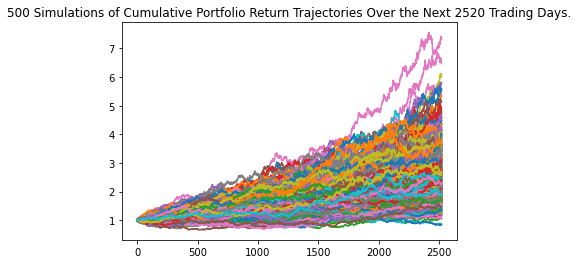

In [212]:
# Plot simulation outcomes
sim_plot_ten_year = mc_ten_year.plot_simulation()


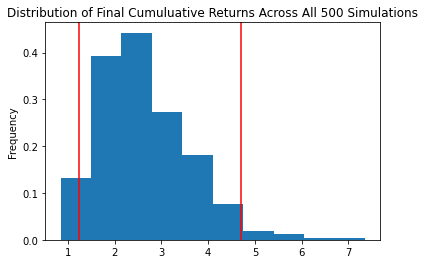

In [207]:
# Plot probability distribution and confidence intervals
dist_plot_ten_year = mc_ten_year.plot_distribution()

In [214]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_ten_year = mc_ten_year.summarize_cumulative_return()

# Print summary statistics
print(stats_ten_year)

count           500.000000
mean              2.628911
std               0.948511
min               0.841590
25%               1.913949
50%               2.515110
75%               3.186689
max               7.351941
95% CI Lower      1.245371
95% CI Upper      4.701300
Name: 2520, dtype: float64


In [210]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stats_ten_year[8]*initial_investment_ten,2)
ci_upper_ten = round(stats_ten_year[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $74722.25 and $282077.99
